## Objective: predict the price of a house

### Secondary: explore characteristics of house using BI tools. 
- understanding which factors are responsible for higher property value - $650K and above.

In [73]:
import pandas as pd
import numpy as np
import matplotlib as map
from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [74]:
data = pd.read_excel("data/regression_data.xls")

# EDA

In [75]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [77]:
data.shape

(21597, 21)

In [78]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [142]:
data.date.describe()

count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object

<Axes: xlabel='date'>

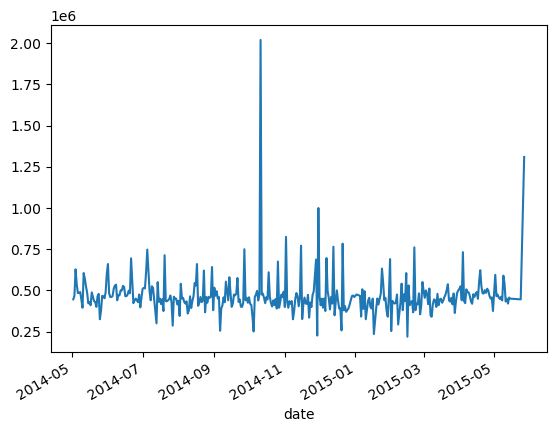

In [145]:
data.groupby("date")["price"].median().plot()

In [79]:
# drop unecessary colums 
data_cleaned = data.drop(columns=["id"])

## Price

In [80]:
print("max price: $", data.price.max()) # $7.7 million

max price: $ 7700000


In [81]:
data_cleaned["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [126]:
print("Mean House Price:", round(data.price.mean(),2))
print("Median House Price:", round(data.price.median(),2))

Mean House Price: 540296.57
Median House Price: 450000.0


Text(0.5, 1.0, 'House Prices')

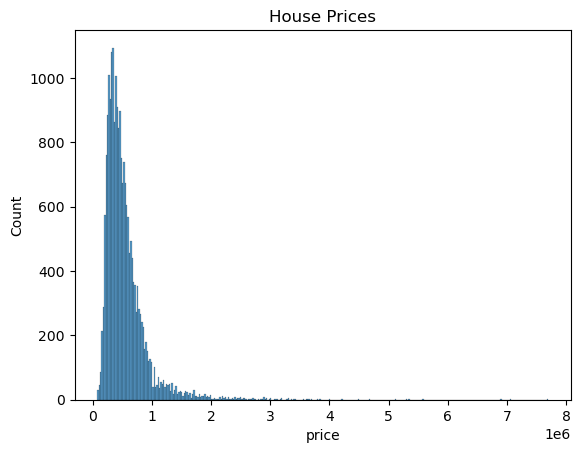

In [82]:
sns.histplot(
    x="price",
    data=data
)
plt.title("House Prices")

Text(0.5, 1.0, 'House Prices')

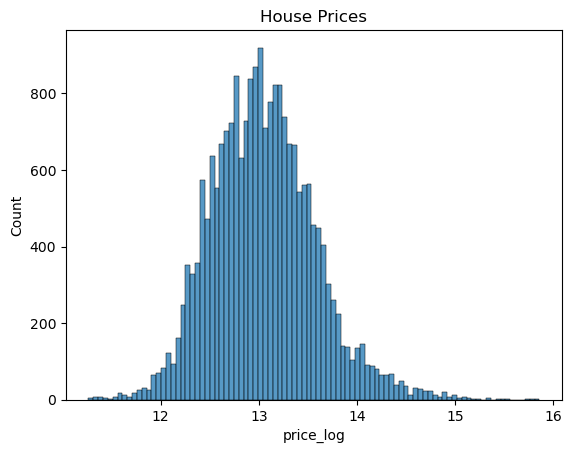

In [83]:
# use Log Transform to deal with price outliers

data_cleaned["price_log"] = np.log1p(data["price"])



# outcome: data is now normal

sns.histplot(
    x="price_log",
    data=data_cleaned
)
plt.title("House Prices")

In [84]:
data_cleaned = data_cleaned.drop(columns={"price"})

# Categorical Variables

### Zip codes

<Axes: xlabel='zipcode', ylabel='Count'>

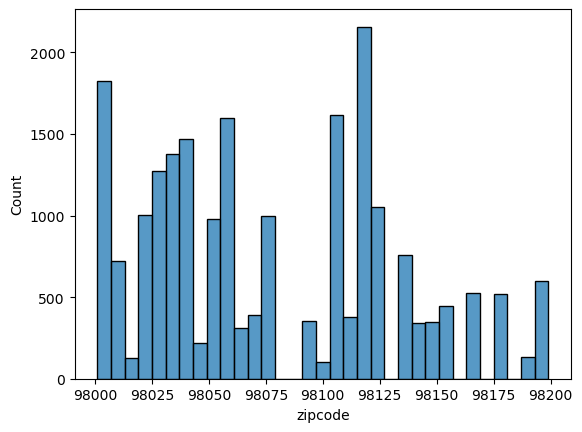

In [85]:
data_cleaned.zipcode.nunique()

sns.histplot(x="zipcode",
             data=data) 

# will drop for linear regression

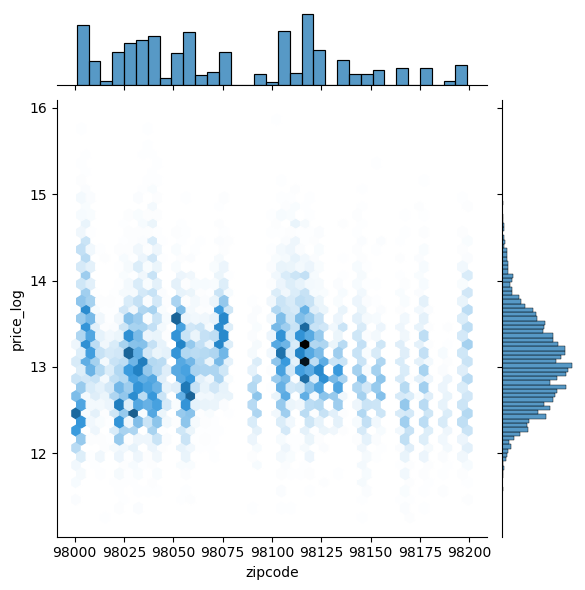

In [136]:
sns.jointplot(x="zipcode",
              y="price_log",
              data=data_cleaned,
              kind="hex")

# hashtrick 
# target encoding

In [141]:
data_cleaned.zipcode.value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

## Condition

In [86]:
data_cleaned.condition.value_counts() # condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='price'>

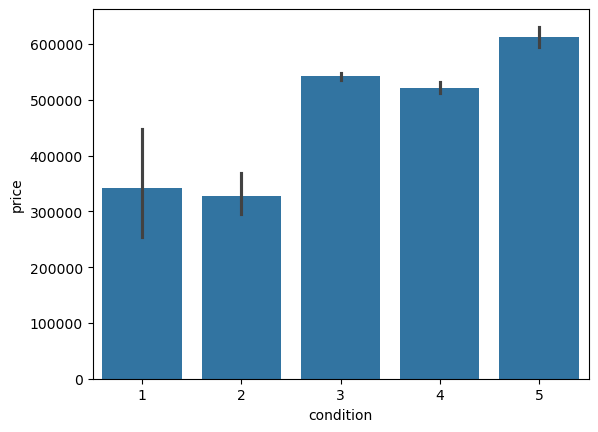

In [87]:
sns.barplot(x="condition",
            y="price",
            data=data)

## Waterfronts

In [88]:
data_cleaned.waterfront.value_counts()

waterfront
0    21434
1      163
Name: count, dtype: int64

<Axes: xlabel='waterfront', ylabel='price'>

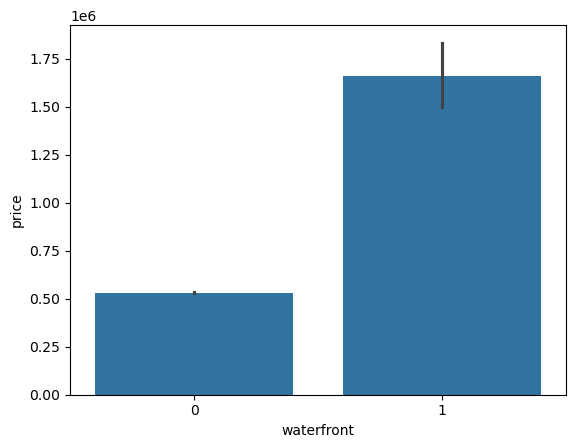

In [89]:
sns.barplot(x="waterfront",
            y="price",
            data=data)

### View

In [90]:
data_cleaned.view.value_counts()

view
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

Text(0, 0.5, 'Price of house')

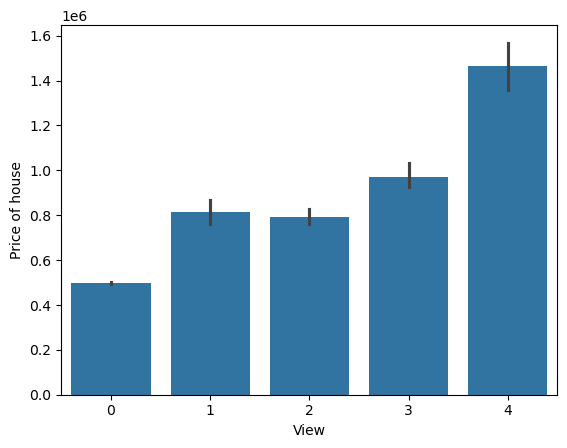

In [91]:
sns.barplot(x="view", 
            y="price",
            data=data)
plt.xlabel("View")
plt.ylabel("Price of house")

## Grade

In [92]:
data_cleaned.grade.value_counts() 
# Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

Text(0, 0.5, 'Price of house')

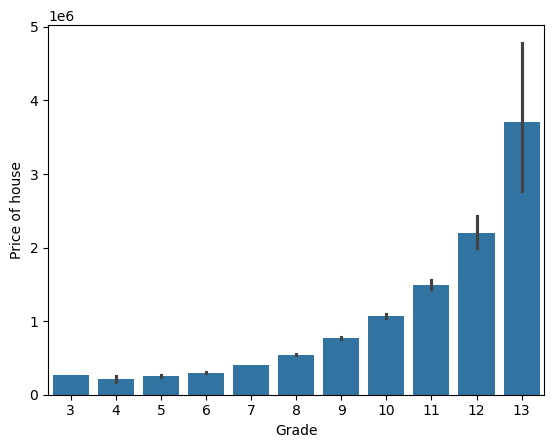

In [93]:
sns.barplot(x="grade", 
            y="price",
            data=data)
plt.xlabel("Grade")
plt.ylabel("Price of house")

## Year rennovated

In [94]:
data_cleaned.yr_renovated.value_counts()
# huge amount of 0, which in this case is likely NaN. Drop for linear regression

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [95]:
data_cleaned.yr_built.value_counts().head(20)

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    317
1962    312
1954    305
2001    305
1987    294
1989    290
1969    280
Name: count, dtype: int64

<Axes: xlabel='yr_built', ylabel='Count'>

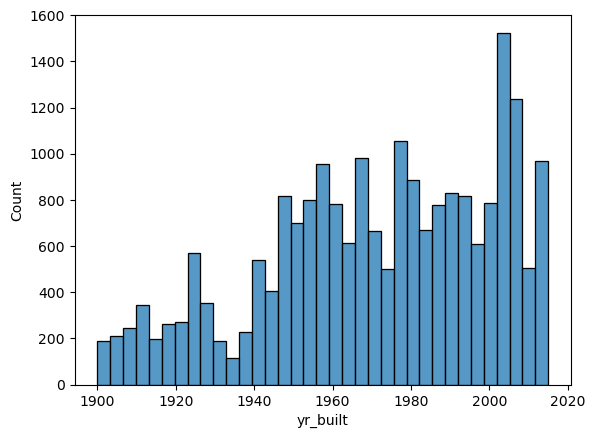

In [96]:
sns.histplot(x="yr_built",
             data=data)

<Axes: xlabel='yr_built'>

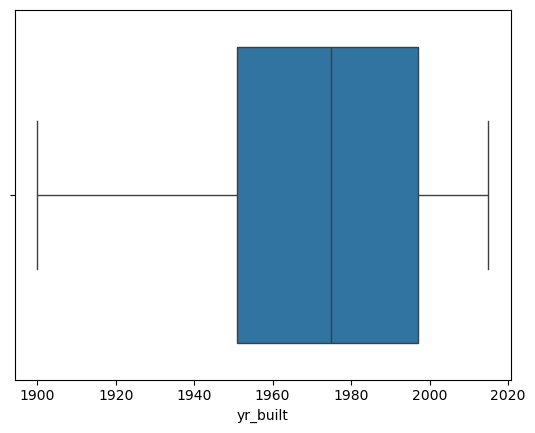

In [97]:
sns.boxplot(x="yr_built",
             data=data)

In [98]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

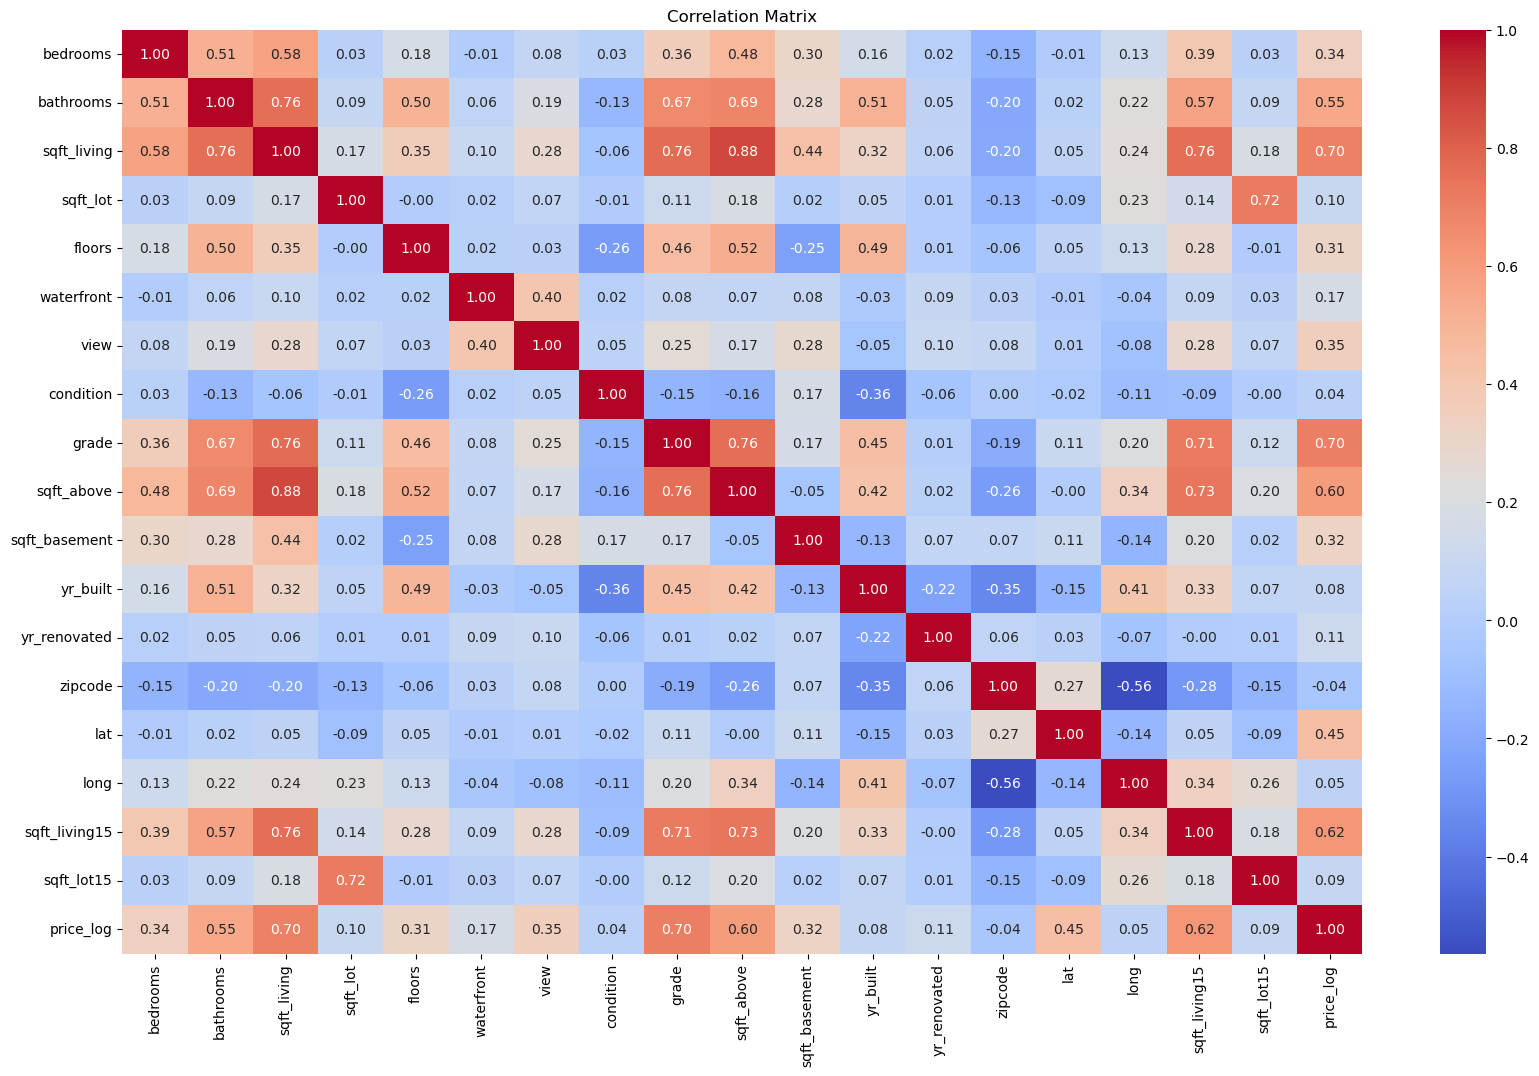

In [99]:
correlation = data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlates 

#### Med to high correlation with target variable: price
- sqft_living: 0.70
- grade: 0.67
- sqft_above: 0.61

#### Dropping correlates (correlate with each other)
- sqft_living & sqft_above: 0.88  (drop sqft_above)
- sqft_living & bathrroms: 0.76
- sqft_lving & grade: 0.76


#### Interactions (correlate moderately with each other and correlate strongly with the target):


In [100]:
crosstab = round((pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"], normalize="index") * 100), 3)

crosstab

view,0,1,2,3,4
waterfront,,,,,
0,90.86,1.544,4.446,2.291,0.858
1,0.00,0.613,4.908,11.656,82.822


In [101]:
crosstab = pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"])

crosstab

view,0,1,2,3,4
waterfront,,,,,
0,19475,331,953,491,184
1,0,1,8,19,135


In [102]:
data_cleaned["sqft_grade"] = data_cleaned["sqft_living"] * data_cleaned["grade"]

In [103]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [104]:
crosstab = pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"])


from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

print("Chi2-stat:", chi2_statistic) 
print("P-value:", chi2_p_value)

Chi2-stat: 7566.88988438114
P-value: 0.0


In [133]:
data_cleaned.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [105]:
data.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [106]:
crosstab = round(pd.crosstab(data_cleaned["bedrooms"], data_cleaned["bathrooms"], normalize="index"), 2) * 100

crosstab

bathrooms,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,...,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.50,7.75,8.00
bedrooms,,,,,,,,,,,,,,,,,,,,,
1,1.0,14.0,70.0,1.0,6.0,2.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,56.0,0.0,11.0,11.0,8.0,4.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,18.0,0.0,8.0,19.0,11.0,11.0,24.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.0,0.0,4.0,10.0,8.0,10.0,36.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,3.0,0.0,3.0,8.0,7.0,7.0,18.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,2.0,0.0,2.0,6.0,9.0,6.0,11.0,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,5.0,0.0,0.0,8.0,5.0,8.0,...,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0


- Bedrooms and bathrooms show a clear, structured relationship: more bedrooms generally mean more bathrooms.

- There is noise and some spread, but the pattern is consistent for normal-sized houses.
- One extreme outlier (33 bedrooms) massively distorts the regression line and should be removed or handled before modeling.

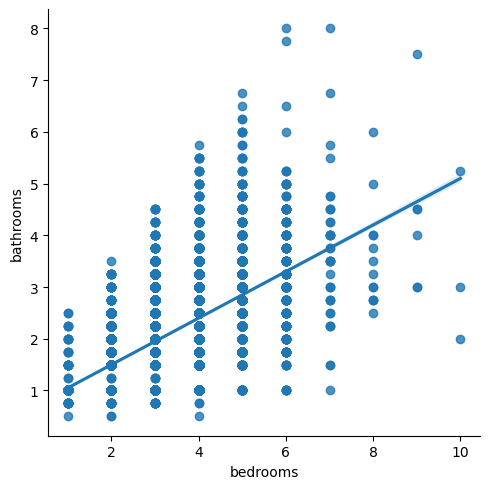

In [107]:
sns.lmplot(data=data_cleaned[data_cleaned["bedrooms"] <= 10],
           x="bedrooms", y="bathrooms")

In [108]:
# prep linear regression model 

# drop target + lat & long and redundant feature 
X = data_cleaned.drop(columns={"price_log", "lat", "long", "sqft_above", "zipcode", 'date', "yr_built", "yr_renovated", "waterfront"})
y = data_cleaned["price_log"]


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [111]:
model = LinearRegression()

# Cross-validate (default is 5-fold)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("CV scores:", scores)
print("Mean CV score:", scores.mean())

model.fit(X_train_scaled, y_train)

CV scores: [0.59111114 0.60850272 0.61038909 0.6012032  0.5930955 ]
Mean CV score: 0.6008603299929154


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = model.score(X_train_scaled, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

# model is underfitting

RMSE train: 0.3330571936851711
MSE train: 0.1109270942654416
R2 train: 0.6016379143486251
RMSE test: 0.3341277348492733
MSE test: 0.11164134319550628
R2 test: 0.5900827483269624


In [113]:
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

bedrooms: -0.0246
bathrooms: -0.0122
sqft_living: 0.2079
sqft_lot: 0.0101
floors: 0.0405
view: 0.0614
condition: 0.0628
grade: 0.2311
sqft_basement: 0.0543
sqft_living15: 0.0635
sqft_lot15: -0.0241
sqft_grade: -0.0935


# KNN Regressor

In [150]:
from sklearn.neighbors import KNeighborsRegressor

X = data_cleaned.drop(columns={"price_log", "lat", "long", "sqft_above", "zipcode", 'date', "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validate (default is 5-fold)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("CV scores:", scores)
print("Mean CV score:", scores.mean())

knn = KNeighborsRegressor(
    n_neighbors=25
)

knn.fit(X_train_scaled, y_train)

from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = knn.score(X_train_scaled, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)


CV scores: [0.59480645 0.60984267 0.61004868 0.60808218 0.59584097]
Mean CV score: 0.603724189375237
RMSE train: 0.30436474985275624
MSE train: 0.09263790095293088
R2 train: 0.6663920574341764
RMSE test: 0.31785832085582927
MSE test: 0.1010339121372873
R2 test: 0.6302899279647832


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, random_state=42, test_size=0.2)

dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
y_pred = dt_model.predict(X_test)

y_train_pred = dt_model.predict(X_train)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = dt_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)


RMSE train: 0.24458866615572603
MSE train: 0.0598236156118372
R2 train: 0.7851610515523788
RMSE test: 0.25009185323356975
MSE test: 0.0625459350538014
R2 test: 0.7703479995249056


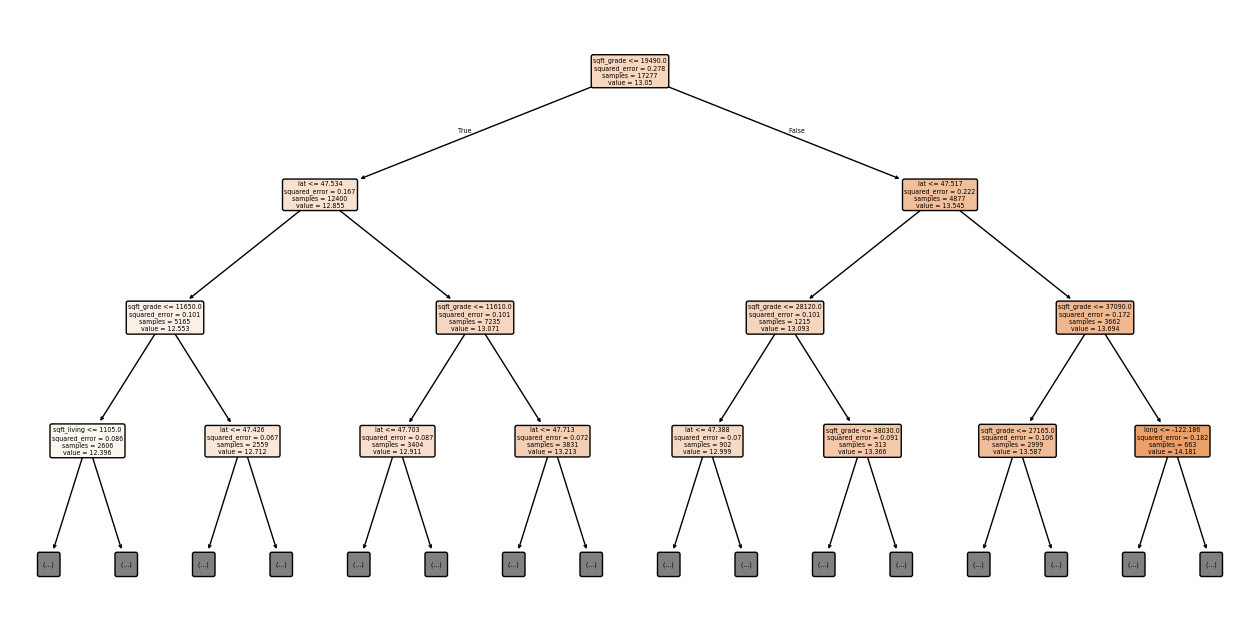

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
tree.plot_tree(dt_model, filled=True,
    feature_names=getattr(dt_model, "feature_names_in_", None),  # or X.columns
    rounded=True, max_depth=3
)
plt.show()


# Decison Tree with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

X = data_cleaned.drop(columns={"date", "price_log"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_root_mean_squared_error'
    n_jobs=-1  # use all CPU cores
)

# Fit it
grid_search.fit(X_train, y_train)

# Get best parameters and model
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: -0.045426897991526625
RMSE train: 0.16720390979177807
MSE train: 0.02795714744965706
R2 train: 0.8995676997493015
RMSE test: 0.2142457473525494
MSE test: 0.04590124025865243
R2 test: 0.8316483698986226


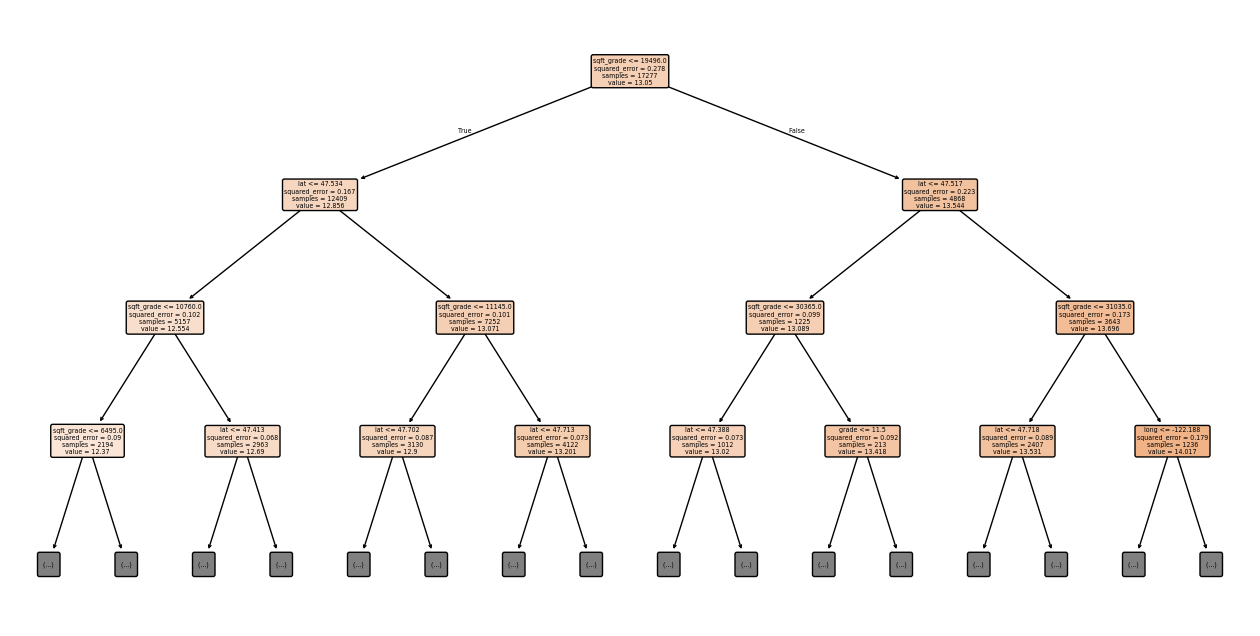

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
tree.plot_tree(best_model, filled=True,
    feature_names=getattr(best_model, "feature_names_in_", None),  # or X.columns
    rounded=True, max_depth=3
)
plt.show()


# Decision Tree GridSearchCV: Light Model

In [ ]:
from sklearn.model_selection import GridSearchCV

X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_root_mean_squared_error'
    n_jobs=-1  # use all CPU cores
)

# Fit it
grid_search.fit(X_train, y_train)


# Get best parameters and model
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: -0.04506271157573295
RMSE train: 0.1682687920061338
MSE train: 0.028314386363203513
R2 train: 0.8983171958097653
RMSE test: 0.21034161033569143
MSE test: 0.04424359303861185
R2 test: 0.8375493204988766


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]


X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [5, 10, 15],
    "n_estimators": [100, 300],
    "max_features": ['sqrt', 0.5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42,
    bootstrap=True),
    n_jobs=1,
    cv=5,
    scoring='r2',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 15, 'max_features': 0.5, 'n_estimators': 300}
Best score: 0.8891082015263816


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

RMSE train: 0.09557233601417076
MSE train: 0.009134071411205561
R2 train: 0.9671976647188707
RMSE test: 0.1722052850533283
MSE test: 0.029654660200298052
R2 test: 0.891115992869089


# Less Complex Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]


X = data_cleaned.drop(columns={"date", "price_log"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [5, 10],
    "n_estimators": [300],
    "max_features": ['log2', 0.5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42,
    bootstrap=True),
    n_jobs=1,
    cv=5,
    scoring='r2',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 300}
Best score: 0.8780532463232653


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

RMSE train: 0.15007280751055674
MSE train: 0.022521847554100617
R2 train: 0.9191193979813015
RMSE test: 0.18143106092813288
MSE test: 0.03291722986950787
R2 test: 0.8791367067559483


In [115]:
from sklearn.ensemble import GradientBoostingRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]


X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [3, 5, 7],
    "n_estimators": [200, 300, 500],
    "max_features": ['log2', 0.5],
    "learning_rate": [0.1, 0.05, 0.001, 0.0001, 0.00001],
    
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    n_jobs=-1,
    cv=5,
    scoring='r2',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'n_estimators': 300}
Best score: 0.8988413510147713
RMSE train: 0.11488941500359875
MSE train: 0.013199577679869142
R2 train: 0.9525975927784835
RMSE test: 0.16497262042187283
MSE test: 0.027215965488859333
R2 test: 0.9000702297599147


In [131]:
y_pred_dollars = np.exp(y_pred)
y_test_dollars = np.exp(y_test)
rmse_dollars = np.sqrt(mean_squared_error(y_test_dollars, y_pred_dollars))

print("Error in $USD:", round(rmse_dollars))

Error in $USD: 122500


- Gradient Boosting is our best model so far.
- THe mode is off by $122,500 per house prediction
- 122k error on ~$540k average = roughly 23% off on average

In [149]:
best_model.feature_importances_

array([0.0018907 , 0.00390249, 0.08753419, 0.01353124, 0.00117529,
       0.00755287, 0.01382045, 0.00736717, 0.13939978, 0.00335011,
       0.01999299, 0.30951023, 0.04695029, 0.03355159, 0.01171111,
       0.2987595 ])

In [ ]:
# basyen hyperparameter tuning
# scatter plot y_pred y_actual 
# optimize for MSE 
# MAE 
# MAPE
# RMSE 

In [151]:
import optuna
optuna.__version__

'4.6.0'

In [ ]:
sns.